In [1]:
import joblib

In [2]:
an=joblib.load("airline_name.pkl")
an_b=joblib.load("airline_name_b.pkl")
cl=joblib.load("class.pkl")
cl_b=joblib.load("class_b.pkl")
dat=joblib.load("depart_arr_time.pkl")
dat_b=joblib.load("depart_arr_time_b.pkl")
du=joblib.load("duration.pkl")
du_b=joblib.load("duration_b.pkl")
p=joblib.load("price.pkl")
p_b=joblib.load("price_b.pkl")
sd=joblib.load("source_des.pkl")
sd_b=joblib.load("source_des_b.pkl")

In [3]:
Class=cl+cl_b
depart_arr_time=dat+dat_b
Duration=du+du_b
Price=p+p_b
source_des=sd+sd_b
Airline_name=an+an_b

In [4]:
Dep_Time=depart_arr_time[0::2]

In [5]:
Arrival_Time=depart_arr_time[1::2]

In [6]:
Source=source_des[0::2]

In [7]:
Destination=source_des[1::2]

In [8]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [9]:
data=pd.DataFrame({'Airline_name':Airline_name,'Source':Source,'Destination':Destination,'Dep_Time':Dep_Time,
                   'Arrival_Time':Arrival_Time,'Duration':Duration,'Class':Class,'Price':Price})

In [10]:
data=data.sample(8946)

In [11]:
data

,Airline_name,Source,Destination,Dep_Time,Arrival_Time,Duration,Class,Price
8041,Vistara,Hyderabad,Kolkata,13:25,22:45,09h 20m\n1-stop,Business,"52,054"
7272,Air India,Bangalore,Kolkata,19:15,09:00,13h 45m\n1-stop,Business,
3255,Indigo,Chennai,Kolkata,13:25,15:30,02h 05m\nnon-stop,Economy,"5,202"
2342,Air India,Bangalore,Chennai,21:20,17:20,20h 00m\n1-stop,Economy,"10,939"
4045,SpiceJet,Hyderabad,Kolkata,06:10,22:35,16h 25m\n1-stop,Economy,"10,107"
...,...,...,...,...,...,...,...,...
5365,Air India,Jaipur,Lucknow,14:00,13:25,23h 25m\n1-stop,Economy,"14,876"
4693,Indigo,Kolkata,Chennai,05:40,12:10,06h 30m\n1-stop,Economy,"6,506"
3786,Indigo,Hyderabad,Bangalore,06:35,10:20,03h 45m\n1-stop,Economy,
6530,Vistara,Mumbai,Delhi,12:00,18:20,06h 20m\n1-stop,Business,"64,845"


In [12]:
data['Stops']=data['Duration'].str.split("\n").str.slice(1).str.join("")

In [13]:
data['Duration']=data['Duration'].str.split("\n").str.slice(0,1).str.join("")

In [14]:
data

,Airline_name,Source,Destination,Dep_Time,Arrival_Time,Duration,Class,Price,Stops
8041,Vistara,Hyderabad,Kolkata,13:25,22:45,09h 20m,Business,"52,054",1-stop
7272,Air India,Bangalore,Kolkata,19:15,09:00,13h 45m,Business,,1-stop
3255,Indigo,Chennai,Kolkata,13:25,15:30,02h 05m,Economy,"5,202",non-stop
2342,Air India,Bangalore,Chennai,21:20,17:20,20h 00m,Economy,"10,939",1-stop
4045,SpiceJet,Hyderabad,Kolkata,06:10,22:35,16h 25m,Economy,"10,107",1-stop
...,...,...,...,...,...,...,...,...,...
5365,Air India,Jaipur,Lucknow,14:00,13:25,23h 25m,Economy,"14,876",1-stop
4693,Indigo,Kolkata,Chennai,05:40,12:10,06h 30m,Economy,"6,506",1-stop
3786,Indigo,Hyderabad,Bangalore,06:35,10:20,03h 45m,Economy,,1-stop
6530,Vistara,Mumbai,Delhi,12:00,18:20,06h 20m,Business,"64,845",1-stop


In [15]:
data.shape

(8946, 9)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8946 entries, 8041 to 66
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Airline_name  8946 non-null   object
 1   Source        8946 non-null   object
 2   Destination   8946 non-null   object
 3   Dep_Time      8946 non-null   object
 4   Arrival_Time  8946 non-null   object
 5   Duration      8946 non-null   object
 6   Class         8946 non-null   object
 7   Price         8946 non-null   object
 8   Stops         8946 non-null   object
dtypes: object(9)
memory usage: 698.9+ KB


In [17]:
data.isnull().sum()

Airline_name    0
Source          0
Destination     0
Dep_Time        0
Arrival_Time    0
Duration        0
Class           0
Price           0
Stops           0
dtype: int64

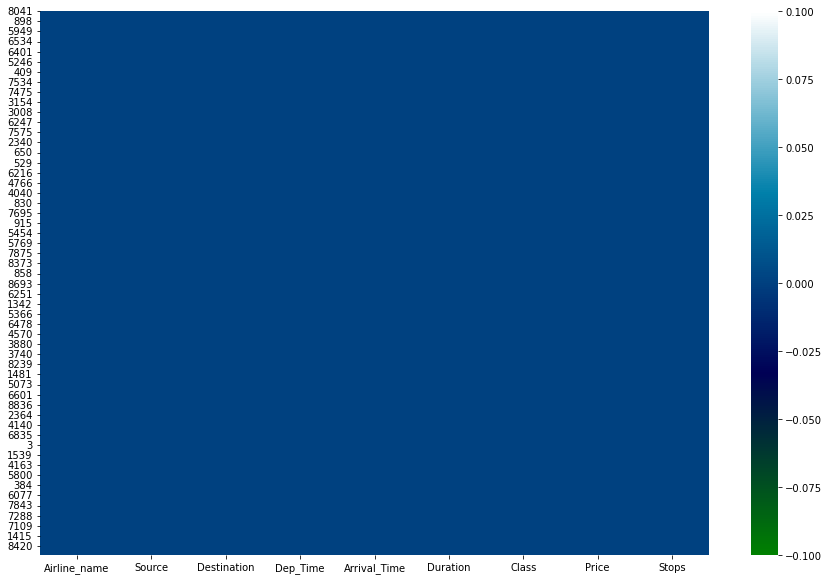

In [18]:
plt.figure(figsize=[15,10])
sns.heatmap(data.isnull(),cmap='ocean')
plt.show()

### Observation-1
In the above dataset :

1) The size of table is 8946*6 i.e. no. of rows are 8946 and no. of columns are 6(including target).

2) All the columns are object type in nature because we got the data using web scraping, In the upcoming steps we will change where neccesary.

3) Null values are not present in the data set as we can see in ths seaborn heatmap, so there is no need to adopt imputation techniuqe, but we can get some blank spaces, so we will drop that blank spaces.

4) In case of object data type, we will apply the encoding technique to convert the values in the numeric format.

### Data Cleaning

In [19]:
backup=data.copy()

In [20]:
data['Stops'].value_counts()

1-stop                 7122
non-stop                920
2+-stop                 843
1-stop Via IDR           35
1-stop Via Indore        18
1-stop Via Delhi          3
1-stop Via Guwahati       2
1-stop Via RPR            2
1-stop Via Mumbai         1
Name: Stops, dtype: int64

In [21]:
data['Stops']=data['Stops'].replace({"1-stop Via IDR":"1-stop",
                                    "1-stop Via Indore":"1-stop",
                                    "1-stop Via Delhi":"1-stop",
                                    "1-stop Via Guwahati":"1-stop",
                                    "1-stop Via RPR":"1-stop",
                                    "1-stop Via Mumbai":"1-stop"})
data['Stops'].value_counts()

1-stop      7183
non-stop     920
2+-stop      843
Name: Stops, dtype: int64

In [22]:
data=data[data['Price']!=""]

In [23]:
data.head()

,Airline_name,Source,Destination,Dep_Time,Arrival_Time,Duration,Class,Price,Stops
8041,Vistara,Hyderabad,Kolkata,13:25,22:45,09h 20m,Business,"52,054",1-stop
3255,Indigo,Chennai,Kolkata,13:25,15:30,02h 05m,Economy,"5,202",non-stop
2342,Air India,Bangalore,Chennai,21:20,17:20,20h 00m,Economy,"10,939",1-stop
4045,SpiceJet,Hyderabad,Kolkata,06:10,22:35,16h 25m,Economy,"10,107",1-stop
6060,Vistara,Delhi,Mumbai,15:55,23:30,07h 35m,Business,"59,033",1-stop


In [24]:
data['Price']=data['Price'].str.replace(",","").astype(int)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7694 entries, 8041 to 66
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Airline_name  7694 non-null   object
 1   Source        7694 non-null   object
 2   Destination   7694 non-null   object
 3   Dep_Time      7694 non-null   object
 4   Arrival_Time  7694 non-null   object
 5   Duration      7694 non-null   object
 6   Class         7694 non-null   object
 7   Price         7694 non-null   int32 
 8   Stops         7694 non-null   object
dtypes: int32(1), object(8)
memory usage: 571.0+ KB


In [26]:
data.head()

,Airline_name,Source,Destination,Dep_Time,Arrival_Time,Duration,Class,Price,Stops
8041,Vistara,Hyderabad,Kolkata,13:25,22:45,09h 20m,Business,52054,1-stop
3255,Indigo,Chennai,Kolkata,13:25,15:30,02h 05m,Economy,5202,non-stop
2342,Air India,Bangalore,Chennai,21:20,17:20,20h 00m,Economy,10939,1-stop
4045,SpiceJet,Hyderabad,Kolkata,06:10,22:35,16h 25m,Economy,10107,1-stop
6060,Vistara,Delhi,Mumbai,15:55,23:30,07h 35m,Business,59033,1-stop


### Observation-2

In order to scrape the data we got some garbage data like:

* Price column is present in the the form of object datatype.
* In every row of price column comma(,) was present.
* we had some empty space in between the columns.
* We done some changes in the stop column because 1-stop had been written in the some other formats, so we changed that and winded up in the 1-stop name.

All the above garbage data we removed from the dataset with the help of pandas functions.

# EDA
###### Exploratory Data Analysis (EDA): 
    EDA process will give us the batter understanding towards the pattern of Dataset

Vistara      3218
Air India    2392
Indigo       1314
AirAsia       373
SpiceJet      228
GO FIRST      169
Name: Airline_name, dtype: int64




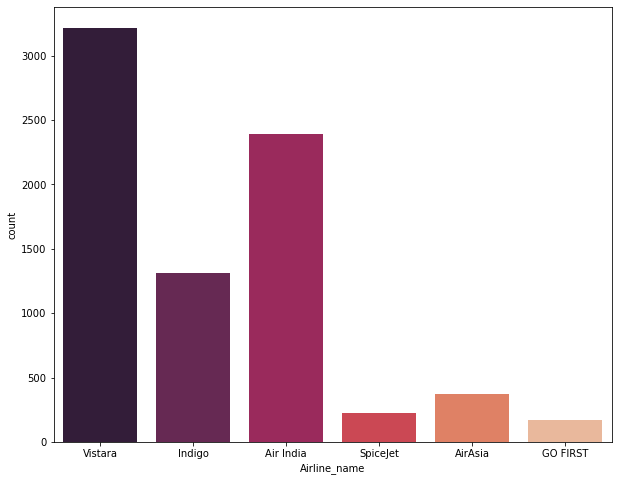

In [27]:
print(data['Airline_name'].value_counts())
print("\n")
plt.figure(figsize=[10,8])
sns.countplot(data['Airline_name'],palette='rocket')
plt.show()

Mumbai       1255
Bangalore    1176
Delhi        1169
Kolkata      1056
Hyderabad     984
Chennai       903
Lucknow       802
Jaipur        349
Name: Source, dtype: int64




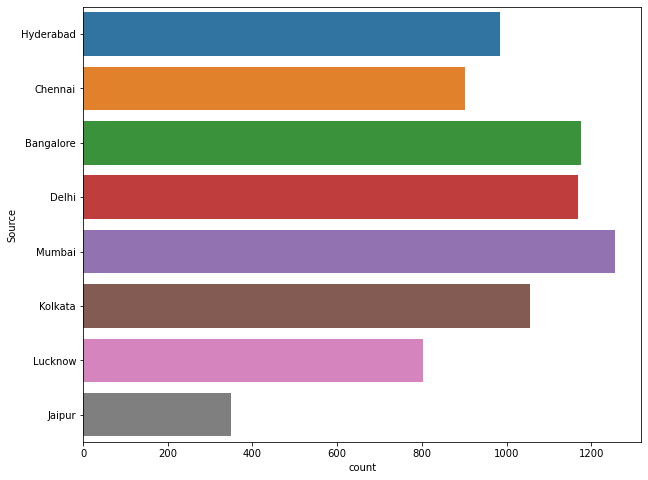

In [28]:
print(data['Source'].value_counts())
print("\n")
plt.figure(figsize=[10,8])
sns.countplot(y=data['Source'])
plt.show()

Mumbai       1279
Delhi        1147
Bangalore    1143
Kolkata      1066
Hyderabad     949
Chennai       879
Lucknow       840
Jaipur        391
Name: Destination, dtype: int64




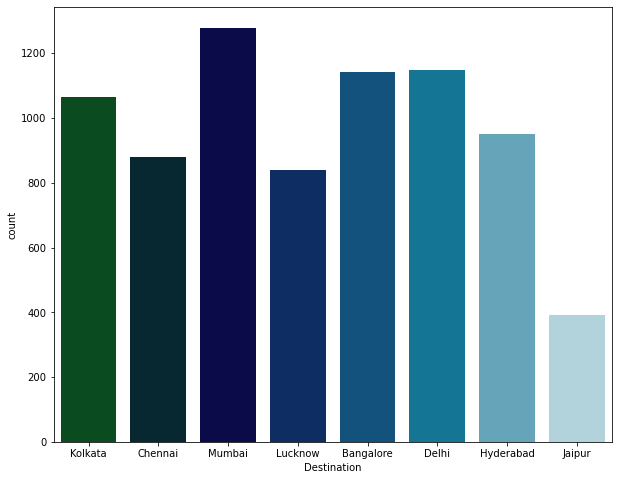

In [29]:
print(data['Destination'].value_counts())
print("\n")
plt.figure(figsize=[10,8])
sns.countplot(x=data['Destination'],palette='ocean')
plt.show()

Economy     5386
Business    2308
Name: Class, dtype: int64




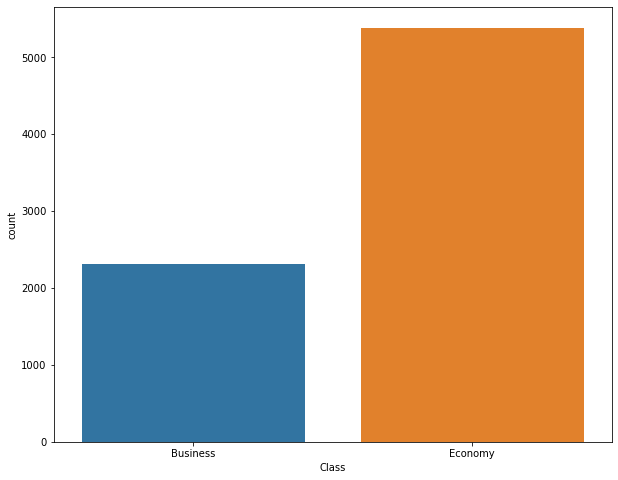

In [30]:
print(data['Class'].value_counts())
print("\n")
plt.figure(figsize=[10,8])
sns.countplot(x=data['Class'],palette='tab10')
plt.show()

1-stop      6314
2+-stop      804
non-stop     576
Name: Stops, dtype: int64




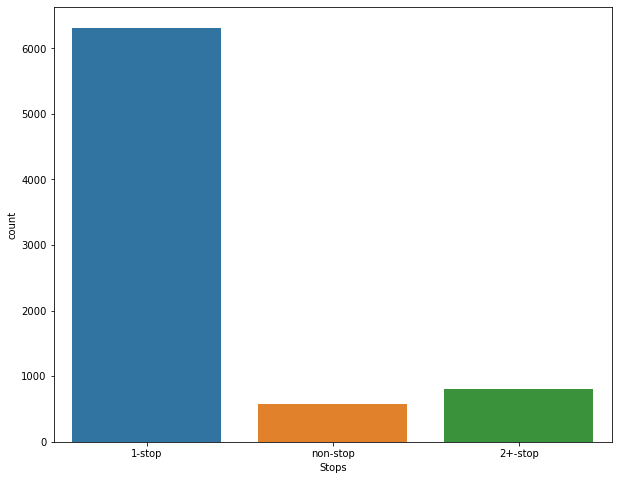

In [31]:
print(data['Stops'].value_counts())
print("\n")
plt.figure(figsize=[10,8])
sns.countplot(x=data['Stops'],palette='tab10')
plt.show()

### Observation-3

From the above graphs we can conclude that:

1) Vistara having a larget number of flights(3218) as compare to other airways.

2) Air india(2392) and Indigo(1314) airways standing over the 2nd and 3rd position and having good flights as comapre to others.

3) Spicejet(228), Air asia(373) and Go first(196) airways have a less number of flights as compare to others.

4) Destination- Mumbai(1279), Banglore(1143) and Delhi(1147) cities are the most preferable destination by the peoples.

5) Delhi, Kolkata ,Mumbai , Chennai and Banglore are the main source of flights but mumbai(1255),banglore(1176) and delhi(1169) is the most preferable source for all the airways.

6) When we see the total stops columns, Most of the flights takes one stopage(6314) and there are many flights also which takes zero stopage(576). Number of 2 stopage is very less.

### Checking Outliers

In [32]:
data.describe()

,Price
count,7694.000000
mean,23062.710424
std,21016.789999
min,5001.000000
25%,8603.000000
50%,12138.000000
75%,41257.750000
max,100947.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x24f164727c0>,
 'caps': [<matplotlib.lines.Line2D at 0x24f1645c2b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24f1646ac10>],
 'medians': [<matplotlib.lines.Line2D at 0x24f1645ca00>],
 'fliers': [<matplotlib.lines.Line2D at 0x24f1645c070>],
 'means': []}

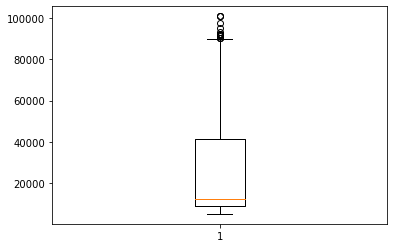

In [33]:
plt.boxplot(data['Price'])

### Checking skewness

In [34]:
data.skew()

Price    1.191039
dtype: float64

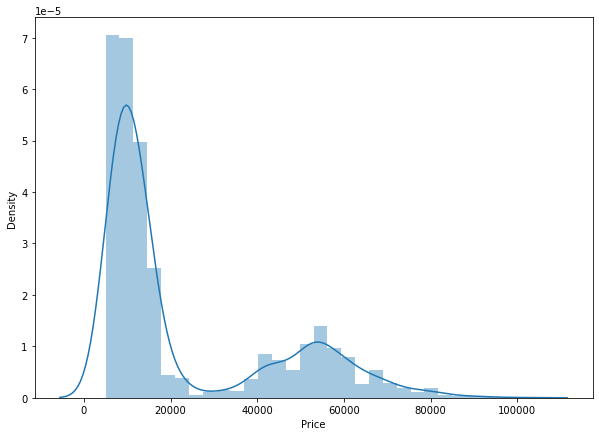

In [35]:
plt.figure(figsize=[10,7])
sns.distplot(data['Price'])
plt.show()

## Observation-4

* In our dataset only 1 columns are showing some outliers that is price. Because the mean is 23062 and standard daviation is 21016 and maximum max values is 100947 which is very higher and reason of outliers.

* High Skewness is present in the kilometers driven column(1.19), shows that data data are not equally distributed.

### Checking Relations

<Figure size 936x504 with 0 Axes>

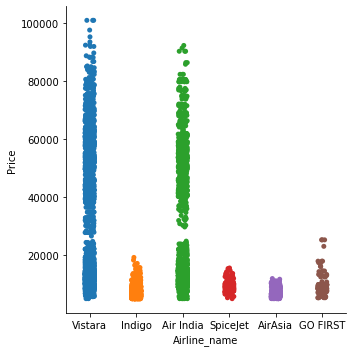

In [36]:
plt.figure(figsize=[13,7])
sns.catplot(data=data,x='Airline_name',y='Price')

<Figure size 936x432 with 0 Axes>

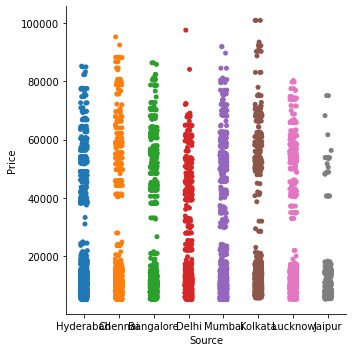

In [37]:
plt.figure(figsize=[13,6])
sns.catplot(data=data,x='Source',y='Price')

<AxesSubplot:xlabel='Destination', ylabel='Price'>

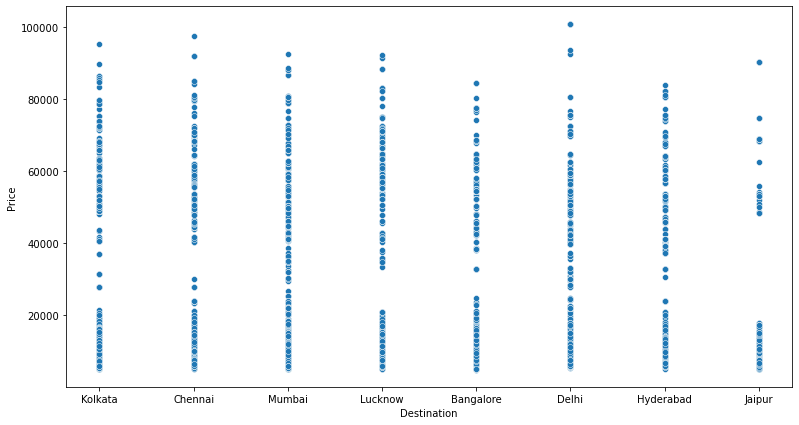

In [38]:
plt.figure(figsize=[13,7])
sns.scatterplot(data=data,x='Destination',y='Price')

<Figure size 936x1080 with 0 Axes>

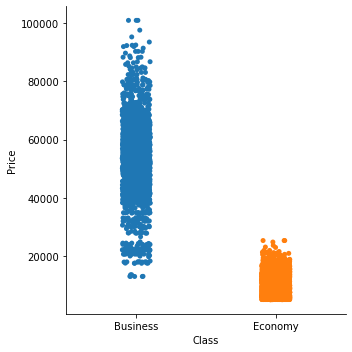

In [39]:
plt.figure(figsize=[13,15])
sns.catplot(data=data,x='Class',y='Price')

<Figure size 936x1080 with 0 Axes>

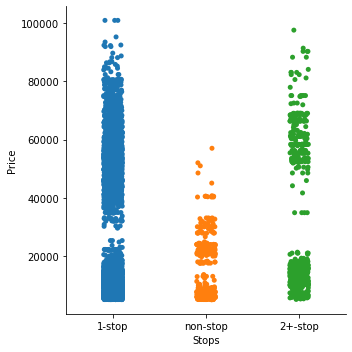

In [40]:
plt.figure(figsize=[13,15])
sns.catplot(data=data,x='Stops',y='Price')

<AxesSubplot:xlabel='Duration', ylabel='Price'>

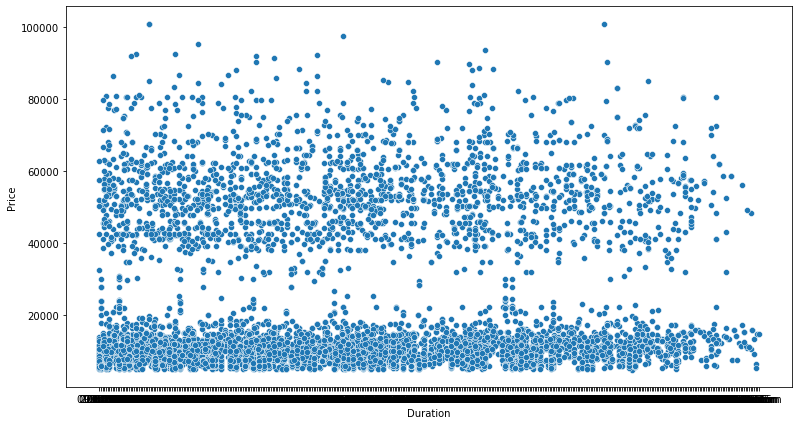

In [41]:
plt.figure(figsize=[13,7])
sns.scatterplot(data=data,x='Duration',y='Price')

### observation-5

As we can see in the above graphs:
    
1) Price of Vistara and Air india are higher as compare to other airlines.

2) The Ticket price of all the sources and destinations are around same with veay less diffrence.

3) The Ticket price is higher when the class type is business.

4) Most of the airlines takes 1 or 2 stops to reach the destination point, and very less flights takes 0 stops to reach the destination point.

## Data Preprocessing

In [42]:
data['Dep_Hour']=pd.to_datetime(data['Dep_Time']).dt.hour
data['Dep_min']=pd.to_datetime(data['Dep_Time']).dt.minute

In [43]:
data['Arrival_Hour']=pd.to_datetime(data['Arrival_Time']).dt.hour
data['Arrival_min']=pd.to_datetime(data['Arrival_Time']).dt.minute

In [44]:
duration=list(data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i]=duration[i].strip()+" 0m"
        else:
            duration[i]="0h "+ duration[i]
            
duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep="h")[0]))
    duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1]))

In [45]:
data['Duration_hour']=duration_hours
data['Duration_min']=duration_mins

In [46]:
data.drop(['Dep_Time','Arrival_Time','Duration'],axis=1,inplace=True)

In [47]:
data

,Airline_name,Source,Destination,Class,Price,Stops,Dep_Hour,Dep_min,Arrival_Hour,Arrival_min,Duration_hour,Duration_min
8041,Vistara,Hyderabad,Kolkata,Business,52054,1-stop,13,25,22,45,9,20
3255,Indigo,Chennai,Kolkata,Economy,5202,non-stop,13,25,15,30,2,5
2342,Air India,Bangalore,Chennai,Economy,10939,1-stop,21,20,17,20,20,0
4045,SpiceJet,Hyderabad,Kolkata,Economy,10107,1-stop,6,10,22,35,16,25
6060,Vistara,Delhi,Mumbai,Business,59033,1-stop,15,55,23,30,7,35
...,...,...,...,...,...,...,...,...,...,...,...,...
2172,Indigo,Bangalore,Mumbai,Economy,5898,non-stop,22,55,0,30,1,35
5365,Air India,Jaipur,Lucknow,Economy,14876,1-stop,14,0,13,25,23,25
4693,Indigo,Kolkata,Chennai,Economy,6506,1-stop,5,40,12,10,6,30
6530,Vistara,Mumbai,Delhi,Business,64845,1-stop,12,0,18,20,6,20


### Adopting Encoding

In [48]:
Airline_name=data[['Airline_name']]

In [49]:
Airline_name=pd.get_dummies(Airline_name,drop_first=True)

In [50]:
Airline_name

,Airline_name_AirAsia,Airline_name_GO FIRST,Airline_name_Indigo,Airline_name_SpiceJet,Airline_name_Vistara
8041,0,0,0,0,1
3255,0,0,1,0,0
2342,0,0,0,0,0
4045,0,0,0,1,0
6060,0,0,0,0,1
...,...,...,...,...,...
2172,0,0,1,0,0
5365,0,0,0,0,0
4693,0,0,1,0,0
6530,0,0,0,0,1


In [51]:
Source=data[['Source']]

In [52]:
Source=pd.get_dummies(Source,drop_first=True)

In [53]:
Source

,Source_Chennai,Source_Delhi,Source_Hyderabad,Source_Jaipur,Source_Kolkata,Source_Lucknow,Source_Mumbai
8041,0,0,1,0,0,0,0
3255,1,0,0,0,0,0,0
2342,0,0,0,0,0,0,0
4045,0,0,1,0,0,0,0
6060,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
2172,0,0,0,0,0,0,0
5365,0,0,0,1,0,0,0
4693,0,0,0,0,1,0,0
6530,0,0,0,0,0,0,1


In [54]:
Destination=data[['Destination']]

In [55]:
Destination=pd.get_dummies(Destination,drop_first=True)

In [56]:
Destination

,Destination_Chennai,Destination_Delhi,Destination_Hyderabad,Destination_Jaipur,Destination_Kolkata,Destination_Lucknow,Destination_Mumbai
8041,0,0,0,0,1,0,0
3255,0,0,0,0,1,0,0
2342,1,0,0,0,0,0,0
4045,0,0,0,0,1,0,0
6060,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
2172,0,0,0,0,0,0,1
5365,0,0,0,0,0,1,0
4693,1,0,0,0,0,0,0
6530,0,1,0,0,0,0,0


In [57]:
Class=data[['Class']]

In [58]:
Class=pd.get_dummies(Class,drop_first=True)

In [59]:
Class

,Class_Economy
8041,0
3255,1
2342,1
4045,1
6060,0
...,...
2172,1
5365,1
4693,1
6530,0


In [60]:
Stops=data[['Stops']]

In [61]:
Stops=pd.get_dummies(Stops,drop_first=True)

In [62]:
Stops

,Stops_2+-stop,Stops_non-stop
8041,0,0
3255,0,1
2342,0,0
4045,0,0
6060,0,0
...,...,...
2172,0,1
5365,0,0
4693,0,0
6530,0,0


### Droping above five columns

In [63]:
data.drop(['Airline_name'],axis=1,inplace=True)

In [64]:
data.drop(['Source'],axis=1,inplace=True)
data.drop(['Destination'],axis=1,inplace=True)
data.drop(['Class'],axis=1,inplace=True)
data.drop(['Stops'],axis=1,inplace=True)

### Concatinating Data Frame

In [65]:
data=pd.concat([data,Airline_name,Source,Destination,Class,Stops],axis=1)

In [66]:
data

,Price,Dep_Hour,Dep_min,Arrival_Hour,Arrival_min,Duration_hour,Duration_min,Airline_name_AirAsia,Airline_name_GO FIRST,Airline_name_Indigo,...,Destination_Chennai,Destination_Delhi,Destination_Hyderabad,Destination_Jaipur,Destination_Kolkata,Destination_Lucknow,Destination_Mumbai,Class_Economy,Stops_2+-stop,Stops_non-stop
8041,52054,13,25,22,45,9,20,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3255,5202,13,25,15,30,2,5,0,0,1,...,0,0,0,0,1,0,0,1,0,1
2342,10939,21,20,17,20,20,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4045,10107,6,10,22,35,16,25,0,0,0,...,0,0,0,0,1,0,0,1,0,0
6060,59033,15,55,23,30,7,35,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2172,5898,22,55,0,30,1,35,0,0,1,...,0,0,0,0,0,0,1,1,0,1
5365,14876,14,0,13,25,23,25,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4693,6506,5,40,12,10,6,30,0,0,1,...,1,0,0,0,0,0,0,1,0,0
6530,64845,12,0,18,20,6,20,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [67]:
col=data.columns

### Checking Correlation

In [68]:
data.corr()['Price']

Price                    1.000000
Dep_Hour                 0.080233
Dep_min                  0.022875
Arrival_Hour             0.022614
Arrival_min              0.054988
Duration_hour            0.276455
Duration_min            -0.023638
Airline_name_AirAsia    -0.169973
Airline_name_GO FIRST   -0.097123
Airline_name_Indigo     -0.340164
Airline_name_SpiceJet   -0.112775
Airline_name_Vistara     0.339554
Source_Chennai           0.018073
Source_Delhi            -0.063119
Source_Hyderabad         0.014970
Source_Jaipur           -0.099698
Source_Kolkata           0.027468
Source_Lucknow           0.060400
Source_Mumbai           -0.010012
Destination_Chennai      0.008074
Destination_Delhi       -0.043387
Destination_Hyderabad   -0.009601
Destination_Jaipur      -0.065145
Destination_Kolkata      0.008945
Destination_Lucknow      0.086133
Destination_Mumbai       0.015264
Class_Economy           -0.924074
Stops_2+-stop            0.051135
Stops_non-stop          -0.147493
Name: Price, d

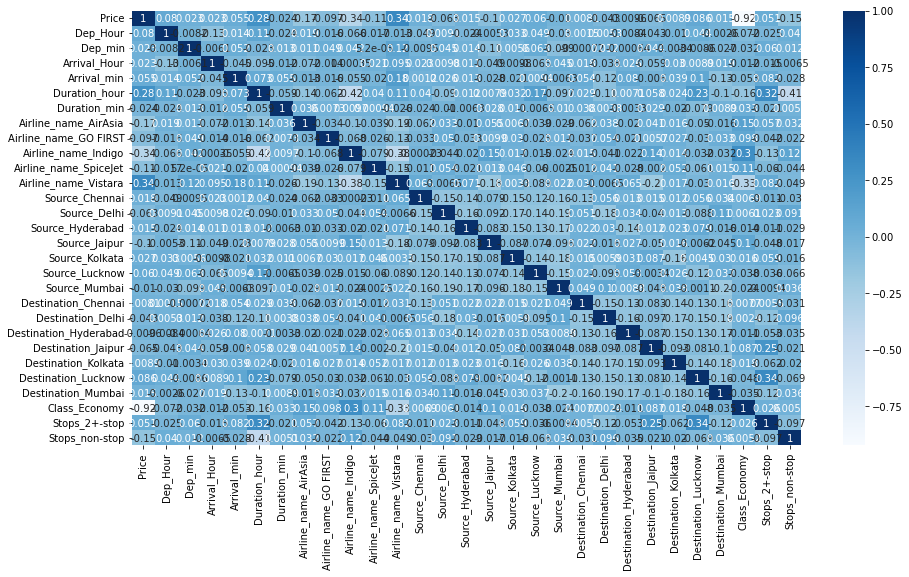

In [69]:
plt.figure(figsize=[15,8])
sns.heatmap(data.corr(),annot=True,cmap='Blues')
plt.show()

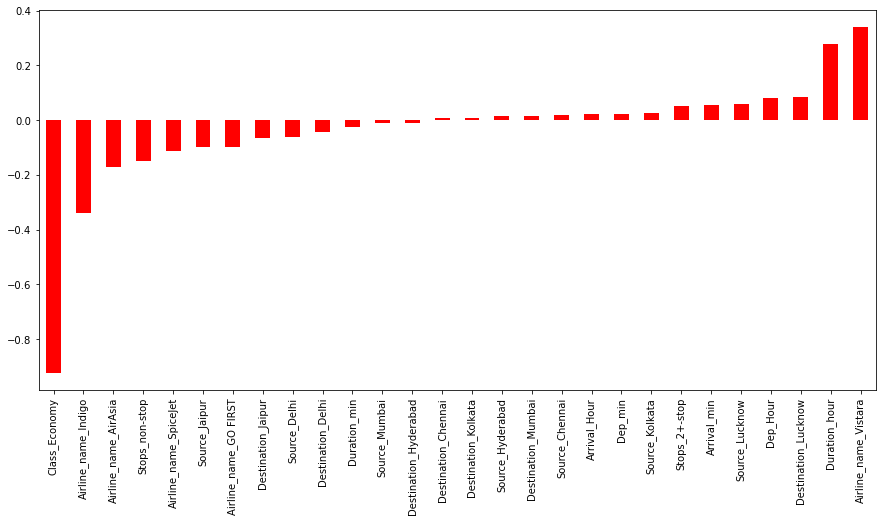

In [70]:
plt.figure(figsize=[15,7])
data.corr()['Price'].sort_values().drop(['Price']).plot(kind='bar',color='r')
plt.show()

### Spliting the data into x and y

In [71]:
y=data['Price']

In [72]:
data.drop(['Price'],axis=1,inplace=True)

In [73]:
x=data

### Scaling tha data

In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
st=StandardScaler()

In [76]:
data=st.fit_transform(x)

In [79]:
x=pd.DataFrame(x,columns=col)

In [85]:
x.drop(['Price'],inplace=True,axis=1)

#### So basically it will become important to know which type of machine learning model we are going to construct.It depends on the target.
Here we are going to use Regression model because our target column is continous in nature.

For Regression model, Some matrix we are going to find like:

1) R2 Score.

2) Mean absolute error.

3) Mean squared error.

4) Root mean squared error.


#### Models

1. Logistic regression

2. Decision Tree Regressor

3. KNeighbors Regressor

4. Support vectod machine Regressor

5. Random Forest Regressor

6. AdaBoost Regressor

7. Gradient Boosting Regressor

8. XGboost Regressor

In [87]:
import sklearn
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import xgboost as xg
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor,GradientBoostingRegressor

In [88]:
def model_select(model):
    max_score=0
    max_state=0
    for p in range(0,150):
        x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.22, random_state=p)
        md=model()
        md.fit(x_train,y_train)
        predict=md.predict(x_test)
        r2score=r2_score(y_test,predict)
        if r2score>max_score:
            max_score=r2score
            max_state=p
    print("Max score is {} with random state {}".format(max_score,max_state))

## Linear Regression

In [89]:
model_select(LinearRegression)

Max score is 0.906413415591518 with random state 84


In [90]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=84,test_size=0.30)

In [91]:
le=LinearRegression()
le.fit(x_train,y_train)
pred=le.predict(x_test)
print('Mean_squared error:',mean_squared_error(y_test,pred))
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('r2_score:',r2_score(y_test,pred))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

Mean_squared error: 45742487.7731023
Mean absolute error: 4344.190320553073
r2_score: 0.8969761949232018
Root mean squared error: 6763.319286644857


In [92]:
for i in range(8,15):
    cvs=cross_val_score(le,x,y,cv=i)
    print("Cross validation score when cv =",i,'---',cvs.mean())

Cross validation score when cv = 8 --- 0.8894958478147289
Cross validation score when cv = 9 --- 0.889578941542923
Cross validation score when cv = 10 --- 0.8894137840749661
Cross validation score when cv = 11 --- 0.8892599147482244
Cross validation score when cv = 12 --- 0.8892383299350833
Cross validation score when cv = 13 --- 0.8894707183164692
Cross validation score when cv = 14 --- 0.8894992616113567


In [98]:
lr=88.95

## Decision tree regressor

In [94]:
model_select(DecisionTreeRegressor)

Max score is 0.939310848549426 with random state 91


In [95]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=91)

In [96]:
Dt=DecisionTreeRegressor()
Dt.fit(x_train,y_train)
pred=Dt.predict(x_test)
print("r2 score : ",r2_score(y_test,pred))
print("Mean absoluate error :",mean_absolute_error(y_test,pred))
print("Means squred error:" ,mean_squared_error(y_test,pred))
print("Root mean squred error: ",np.sqrt(mean_squared_error(y_test,pred)))

r2 score :  0.9364280745236508
Mean absoluate error : 2475.6918693729976
Means squred error: 27082559.893620078
Root mean squred error:  5204.090688450777


In [97]:
for i in range(8,15):
    cvs=cross_val_score(Dt,x,y,cv=i)
    print("Cross validation score when cv =",i,'  ',cvs.mean())

Cross validation score when cv = 8    0.9135861713150757
Cross validation score when cv = 9    0.9130003710018837
Cross validation score when cv = 10    0.9183341504252936
Cross validation score when cv = 11    0.9153729351290181
Cross validation score when cv = 12    0.9153420826143307
Cross validation score when cv = 13    0.9154236543184344
Cross validation score when cv = 14    0.9174774123143304


In [99]:
dt=91.83

## KNeighbor regressor

In [102]:
model_select(KNeighborsRegressor)

Max score is 0.24816397991633676 with random state 8


In [103]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=8)

In [104]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print("r2 score :",r2_score(y_test,pred))
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squred error :",mean_squared_error(y_test,pred))
print("Root mean squred error:",np.sqrt(mean_squared_error(y_test,pred)))

r2 score : 0.24816397991633676
Mean absolute error: 14154.41393975192
Mean squred error : 345593028.1108092
Root mean squred error: 18590.13254688651


In [105]:
for i in range(7,15):
    cvs=cross_val_score(knn,x,y,cv=i,)
    print("Cross validation score when cv =",i,'---',cvs.mean())

Cross validation score when cv = 7 --- 0.2134633419612564
Cross validation score when cv = 8 --- 0.2102715996913524
Cross validation score when cv = 9 --- 0.20940495694621752
Cross validation score when cv = 10 --- 0.2129120740028788
Cross validation score when cv = 11 --- 0.2144506030548137
Cross validation score when cv = 12 --- 0.2185877682225871
Cross validation score when cv = 13 --- 0.21968676907496087
Cross validation score when cv = 14 --- 0.22192220894338086


In [106]:
knn=21.85

## Ridge Regressor

In [107]:
model_select(Ridge)

Max score is 0.9064099985435649 with random state 84


In [108]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=84)

In [109]:
ri=Ridge()
ri.fit(x_train,y_train)
pred=ri.predict(x_test)
print("r2 score :",r2_score(y_test,pred))
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squred error :",mean_squared_error(y_test,pred))
print("Root mean squred error:",np.sqrt(mean_squared_error(y_test,pred)))

r2 score : 0.9064099985435649
Mean absolute error: 4193.886064380638
Mean squred error : 41188039.4052106
Root mean squred error: 6417.790850846622


In [110]:
for i in range(7,15):
    cvs=cross_val_score(ri,x,y,cv=i)
    print("Cross validation score when cv =",i,'---',cvs.mean())

Cross validation score when cv = 7 --- 0.88958826870047
Cross validation score when cv = 8 --- 0.889497478211397
Cross validation score when cv = 9 --- 0.8895802771586315
Cross validation score when cv = 10 --- 0.8894158846716207
Cross validation score when cv = 11 --- 0.8892617315125834
Cross validation score when cv = 12 --- 0.8892403276853442
Cross validation score when cv = 13 --- 0.889471848415134
Cross validation score when cv = 14 --- 0.889500745927088


In [111]:
rr=88.95

## Ensamble technique --

## Random forest regressor

In [112]:
model_select(RandomForestRegressor)

Max score is 0.9613425827353269 with random state 81


In [113]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=81)

In [114]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred=rfr.predict(x_test)
print("r2 score:",r2_score(y_test,pred))
print("Mean absolute error",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 0.960958183982789
Mean absolute error 2202.3189646525775
Mean squared error: 16154957.16573262
Root mean squared error: 4019.3229735532104


In [115]:
for i in range(7,15):
    cvs=cross_val_score(rfr,x,y,cv=i)
    print("Cross validation score when cv =",i,'---',cvs.mean())

Cross validation score when cv = 7 --- 0.9530172460146881
Cross validation score when cv = 8 --- 0.9530208484618818
Cross validation score when cv = 9 --- 0.9532080015425417
Cross validation score when cv = 10 --- 0.9532643892968169
Cross validation score when cv = 11 --- 0.9530548237457879
Cross validation score when cv = 12 --- 0.9532877906484098
Cross validation score when cv = 13 --- 0.9539454060960261
Cross validation score when cv = 14 --- 0.9552397336113776


In [116]:
rf=95.55

## AdaBoostRegressor

In [117]:
model_select(AdaBoostRegressor)

Max score is 0.9165173832640046 with random state 26


In [118]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=26)

In [119]:
ada=AdaBoostRegressor()
ada.fit(x_train,y_train)
pred=ada.predict(x_test)
print("r2 score:",r2_score(y_test,pred))
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 0.9172806996697114
Mean absolute error: 3776.6326819232836
Mean squared error: 35060862.850603975
Root mean squared error: 5921.221398546416


In [120]:
for i in range(7,12):
    cvs=cross_val_score(ada,x,y,cv=i)
    print("Cross validation score when cv =",i,'---',cvs.mean())

Cross validation score when cv = 7 --- 0.8996444652450414
Cross validation score when cv = 8 --- 0.9003444302939598
Cross validation score when cv = 9 --- 0.9005999446151434
Cross validation score when cv = 10 --- 0.8978554657992023
Cross validation score when cv = 11 --- 0.90107159860973


In [121]:
ada=90.10

## GradientBoostingRegressor

In [122]:
model_select(GradientBoostingRegressor)

Max score is 0.9395664936737574 with random state 26


In [123]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=26)

In [124]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)
print("r2 score:",r2_score(y_test,pred))
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 0.9420805971946373
Mean absolute error: 2933.6675085427046
Mean squared error: 24549340.118199047
Root mean squared error: 4954.729066074052


In [125]:
for i in range(7,15):
    cvs=cross_val_score(gbr,x,y,cv=i)
    print("Cross validation score when cv =",i,'---',cvs.mean())

Cross validation score when cv = 7 --- 0.9286896334978233
Cross validation score when cv = 8 --- 0.9286726673758229
Cross validation score when cv = 9 --- 0.9285406300717486
Cross validation score when cv = 10 --- 0.9287488634363845
Cross validation score when cv = 11 --- 0.9284877746892959
Cross validation score when cv = 12 --- 0.92853440621285
Cross validation score when cv = 13 --- 0.9289011538938527
Cross validation score when cv = 14 --- 0.9289468477875301


In [126]:
gbr=92.89

## Xg Boost regressor

In [127]:
model_select(xg.XGBRegressor)

Max score is 0.9678951262737303 with random state 128


In [128]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=128)

In [129]:
XG=xg.XGBRegressor()
XG.fit(x_train,y_train)
pred=XG.predict(x_test)
print("r2 score:",r2_score(y_test,pred))
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 0.9678951262737303
Mean absolute error: 2201.828244258297
Mean squared error: 13323603.857730653
Root mean squared error: 3650.1512102556317


In [130]:
for i in range(7,15):
    cvs=cross_val_score(XG,x,y,cv=i)
    print("Cross validation score when cv =",i,'---',cvs.mean())

Cross validation score when cv = 7 --- 0.9594188479862471
Cross validation score when cv = 8 --- 0.9592085641241923
Cross validation score when cv = 9 --- 0.9614869724990448
Cross validation score when cv = 10 --- 0.9603983495110076
Cross validation score when cv = 11 --- 0.9612008905933312
Cross validation score when cv = 12 --- 0.9608042361604697
Cross validation score when cv = 13 --- 0.9607294241066857
Cross validation score when cv = 14 --- 0.9612800605196294


In [131]:
xg=96.12

### Comparison of all the models

In [132]:
jj=({'R2 score':[lr,dt,knn,rr,rf,ada,gbr,xg]})

In [133]:
result=pd.DataFrame(jj,index=['Linear_Regression','Decision tree','kneighbour','Ridge',
                              'Random forest','Adaboost','GredientBoosting','XGBoost',])

In [134]:
result

,R2 score
Linear_Regression,88.95
Decision tree,91.83
kneighbour,21.85
Ridge,88.95
Random forest,95.55
Adaboost,90.10
GredientBoosting,92.89
XGBoost,96.12


In [135]:
aa=list(result['R2 score'])

In [136]:
bb=result.index

In [137]:
kk=pd.DataFrame({'Model':bb,'Score':aa},index=[1,2,3,4,5,6,7,8])

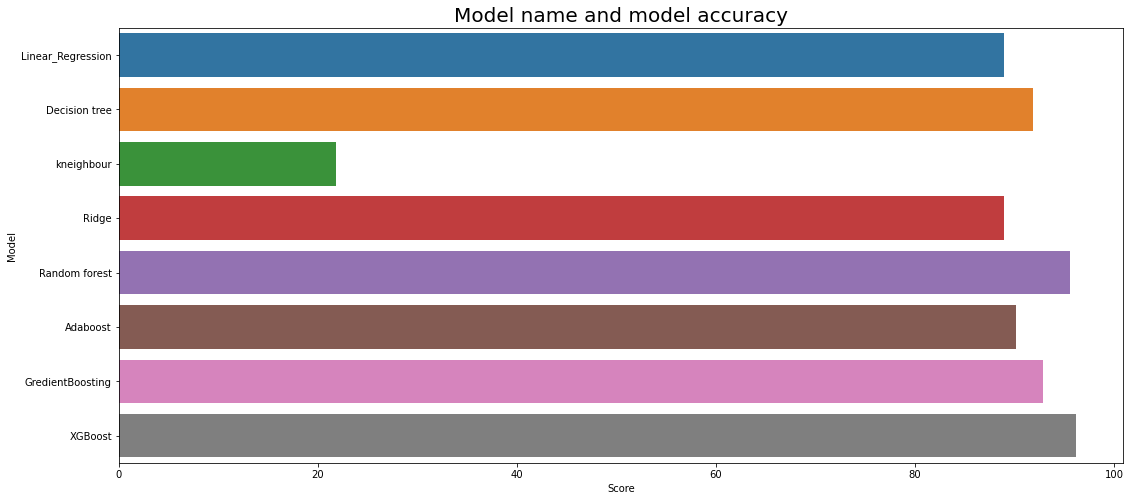

In [138]:
plt.figure(figsize=[18,8])
sns.barplot(data=kk,y='Model',x='Score')
plt.title("Model name and model accuracy",fontsize=20)
plt.show()

## Best Model
### We are chosing Random forest regressor as a best model, Because this model has least diffrence between model acuracy score and cross validation score and also its accuracy is highest as compare to others.That is why we are choosing RFR
### Model accuracy is : 96.17
### Cross_validation score : 95.54	
### Diffrence : 0.62

In [139]:
parameter ={
       'n_estimators':[4,5,6,7],
      'criterion':['mse','mae'],
     'min_samples_split':[2,4,8],
     "max_features" : ["auto", "sqrt", "log2"]}

In [140]:
new_rfr=GridSearchCV(rfr,parameter,cv=9)
new_rfr.fit(x_train,y_train)
new_rfr.best_params_

{'criterion': 'mse',
 'max_features': 'auto',
 'min_samples_split': 4,
 'n_estimators': 6}

In [143]:
new_rfr.best_estimator_

RandomForestRegressor(criterion='mse', max_features='auto', min_samples_split=4,
                      n_estimators=6)

In [146]:
new_rfr_pred = new_rfr.best_estimator_.predict(x_test)
r2_score(y_test,new_rfr_pred)

0.9504249996997617

In [160]:
rfr=RandomForestRegressor(criterion='mse', max_features='auto', min_samples_split=4,n_estimators= 6)
rfr.fit(x_train,y_train)
pred=rfr.predict(x_test)
print("r2 score:",r2_score(y_test,pred))
print("Mean absolute error",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 0.9493249980722208
Mean absolute error 2502.9195403579706
Mean squared error: 21030254.064603586
Root mean squared error: 4585.87549597714


### Model=Random Forest Regressor
### Accuracy=94 %

In [161]:
pred=rfr.predict(x_test)

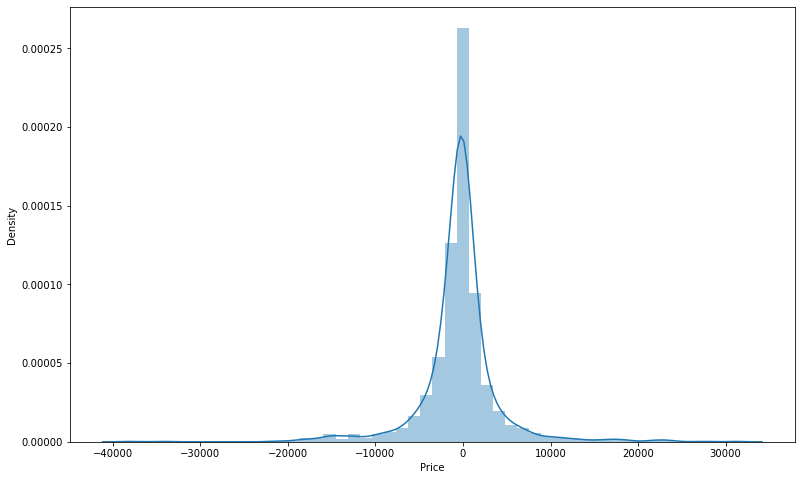

In [162]:
plt.figure(figsize=[13,8])
sns.distplot(y_test-pred)
plt.show()

In [163]:
final=pd.DataFrame([pred[:],y_test[:]],index=['Predict','Original'])

In [164]:
final

,0,1,2,3,4,5,6,7,8,9,...,1683,1684,1685,1686,1687,1688,1689,1690,1691,1692
Predict,7042.944444,51591.263889,11971.844444,14043.333333,7498.166667,51442.044444,32348.222222,62164.861508,66679.666667,10070.0,...,39176.305556,12252.344444,60238.527778,10079.211111,42949.541667,51015.9,13184.533333,12686.916667,6074.041667,49100.294444
Original,7683.000000,49725.000000,10121.000000,16480.000000,7682.000000,55520.000000,50969.000000,46091.000000,75664.000000,10070.0,...,40294.000000,11753.000000,50146.000000,11426.000000,50668.000000,45760.0,12072.000000,12343.000000,5632.000000,52527.000000


In [165]:
import joblib

In [167]:
joblib.dump(rfr,"Flight_price_1")

['Flight_price_1']